In [1]:
#==========================================================================
# Import Libraries
#==========================================================================

import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../Source")
from Posteriors import Posterior

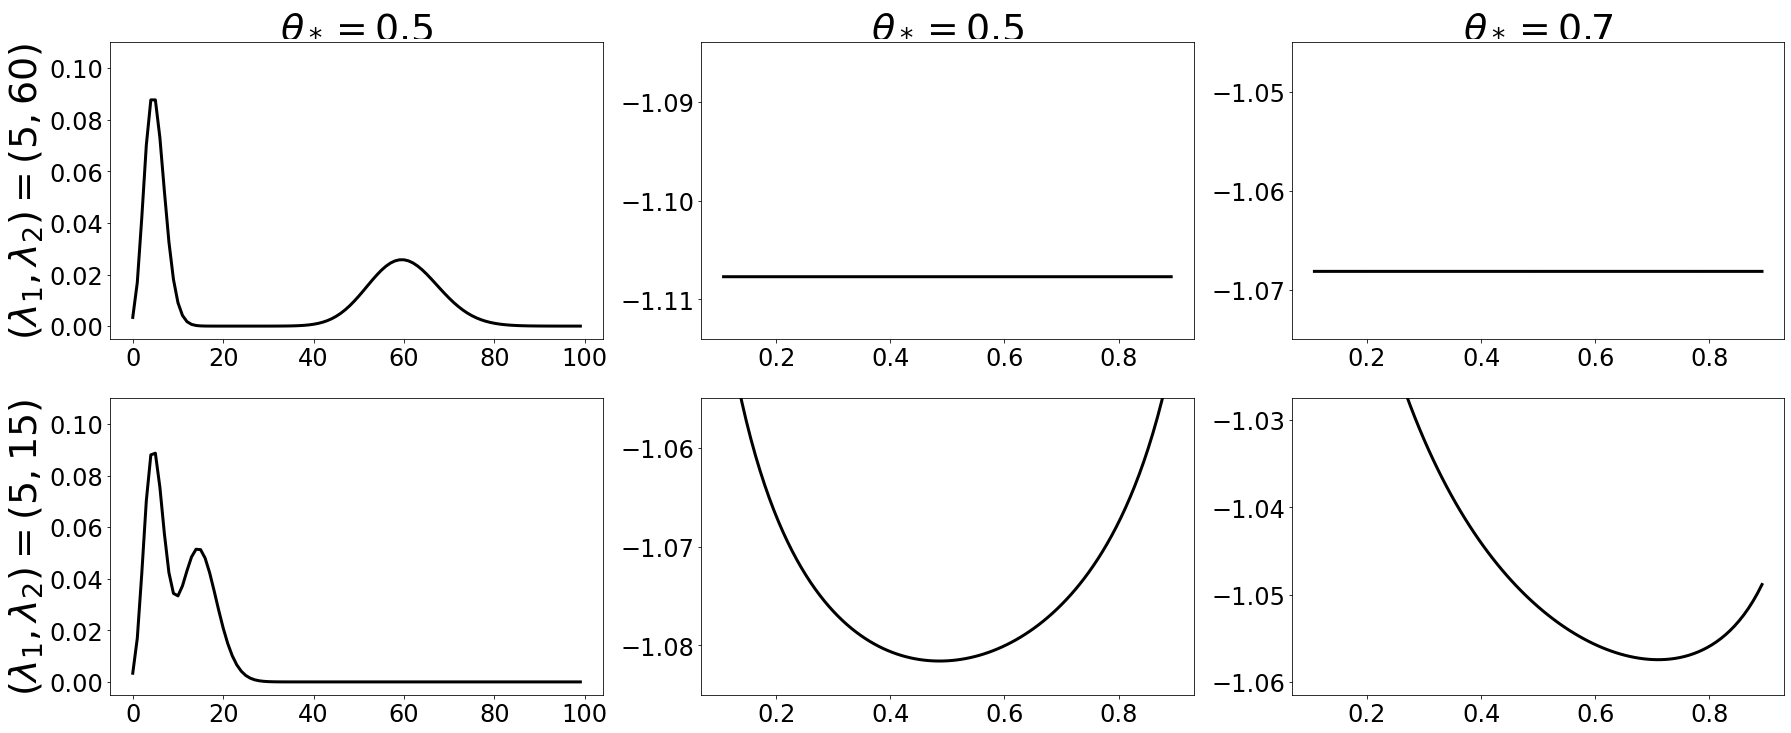

In [89]:
#==========================================================================
# Plot loss surfaces for a given Bernoullie parameter p
#==========================================================================

def experiment(u1=5, u2=20, xmin=0.0, xmax=100, N=100, plotaxs=None):
    torch.manual_seed(0)
    
    P1 = torch.distributions.Poisson(u1)
    P2 = torch.distributions.Poisson(u2)

    def rm(p, X):
        return ( (1 - p) * P1.log_prob(X - 1).exp() + p * P2.log_prob(X - 1).exp() ) / ( (1 - p) * P1.log_prob(X).exp() + p * P2.log_prob(X).exp() )
    
    def dfd(p, X):
        rm1 = rm(p, X[X!=0])
        rp1 = rm(p, X[X!=0]+1)
        return ( rm1 ** 2.0 - 2.0 * rp1 ).sum() / X.shape[0]
    
    grid = torch.arange(0, 100)
    prob = 0.5 * P1.log_prob(grid).exp() + 0.5 * P2.log_prob(grid).exp()
    sns.lineplot(x=grid, y=prob, linewidth=3.0, color="black", linestyle="-", ax=plotaxs[0])
    
    ratio = int(torch.distributions.Binomial(N, 0.5).sample())
    X = torch.zeros(N, 1)
    X[0:ratio, :] = P1.sample(sample_shape=(ratio, 1))
    X[ratio:N, :] = P2.sample(sample_shape=(N-ratio, 1))
    P = torch.linspace(xmin, xmax, 101)[1:-1]
    DFD = torch.tensor([ dfd(p, X) for p in P ])
    sns.lineplot(x=P, y=DFD, linewidth=3.0, color="black", linestyle="-", ax=plotaxs[1])
    
    ratio = int(torch.distributions.Binomial(N, 0.3).sample())
    X = torch.zeros(N, 1)
    X[0:ratio, :] = P1.sample(sample_shape=(ratio, 1))
    X[ratio:N, :] = P2.sample(sample_shape=(N-ratio, 1))
    P = torch.linspace(xmin, xmax, 101)[1:-1]
    DFD = torch.tensor([ dfd(p, X) for p in P ])
    sns.lineplot(x=P, y=DFD, linewidth=3.0, color="black", linestyle="-", ax=plotaxs[2])
    

fig, axs = plt.subplots(2, 3, figsize=(30,12))
experiment(u1=5, u2=60, xmin=0.1, xmax=0.9, N=2000, plotaxs=axs[0,:])
experiment(u1=5, u2=15, xmin=0.1, xmax=0.9, N=2000, plotaxs=axs[1,:])
for i in range(2):
    for j in range(3):
        axs[i,j].tick_params(axis='x', labelsize=24)
        axs[i,j].tick_params(axis='y', labelsize=24)
axs[0,0].set_ylim(-0.005, 0.11)
axs[0,1].set_ylim(-1.114, -1.084)
axs[0,2].set_ylim(-1.075, -1.045)
axs[1,0].set_ylim(-0.005, 0.11)
axs[1,1].set_ylim(-1.085, -1.055)
axs[1,2].set_ylim(-1.0615, -1.0275)
axs[0,0].set_ylabel(r"$(\lambda_1, \lambda_2) = (5, 60)$", fontsize=38)
axs[1,0].set_ylabel(r"$(\lambda_1, \lambda_2) = (5, 15)$", fontsize=38)
axs[0,0].set_title(r"$\theta_* = 0.5$", fontsize=38)
axs[0,1].set_title(r"$\theta_* = 0.5$", fontsize=38)
axs[0,2].set_title(r"$\theta_* = 0.7$", fontsize=38)
fig.savefig('figure_17.eps', format='eps')
